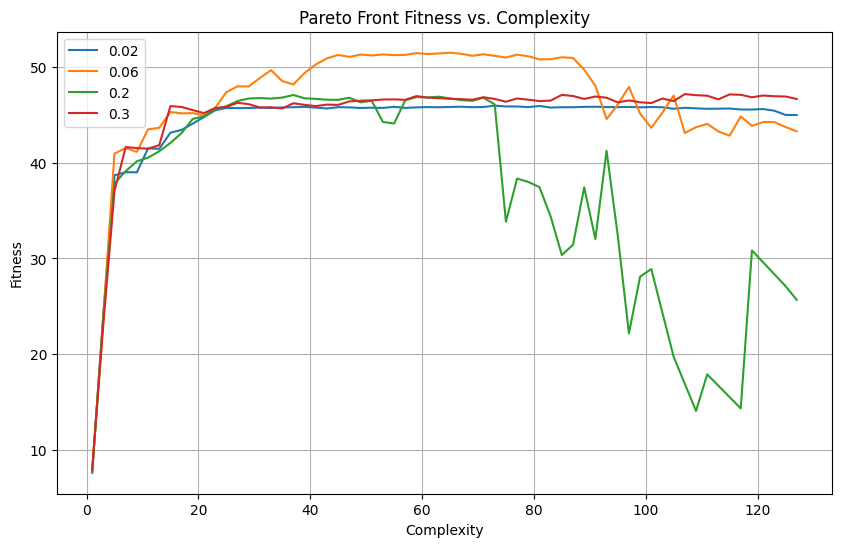

In [34]:
import pickle
import matplotlib.pyplot as plt
import numpy as np


def get_valid_data(file_name):

    with open(file_name + ".pkl", "rb") as f:
        pareto_front = pickle.load(f)

    fitness = pareto_front.fitness.cpu()
    complexity = np.arange(len(fitness))

    valid_complexity = []
    valid_fitness = []
    for c, f in zip(complexity, fitness):
        if f > 0 and c > 0 and c < 256:
            valid_complexity.append(c)
            valid_fitness.append(f)

    return valid_complexity, valid_fitness


x_1, y_1 = get_valid_data("data/results/20250409_000201")
x_2, y_2 = get_valid_data("data/results/20250409_000203")
x_3, y_3 = get_valid_data("data/results/20250408_234103")
x_4, y_4 = get_valid_data("data/results/20250408_234104")

# 绘制图表
plt.figure(figsize=(10, 6))
plt.plot(x_1, y_1, label="0.02")
plt.plot(x_2, y_2, label="0.06")
plt.plot(x_3, y_3, label="0.2")
plt.plot(x_4, y_4, label="0.3")
plt.xlabel("Complexity")
plt.ylabel("Fitness")
plt.title("Pareto Front Fitness vs. Complexity")
plt.grid(True)
plt.legend()
plt.show()

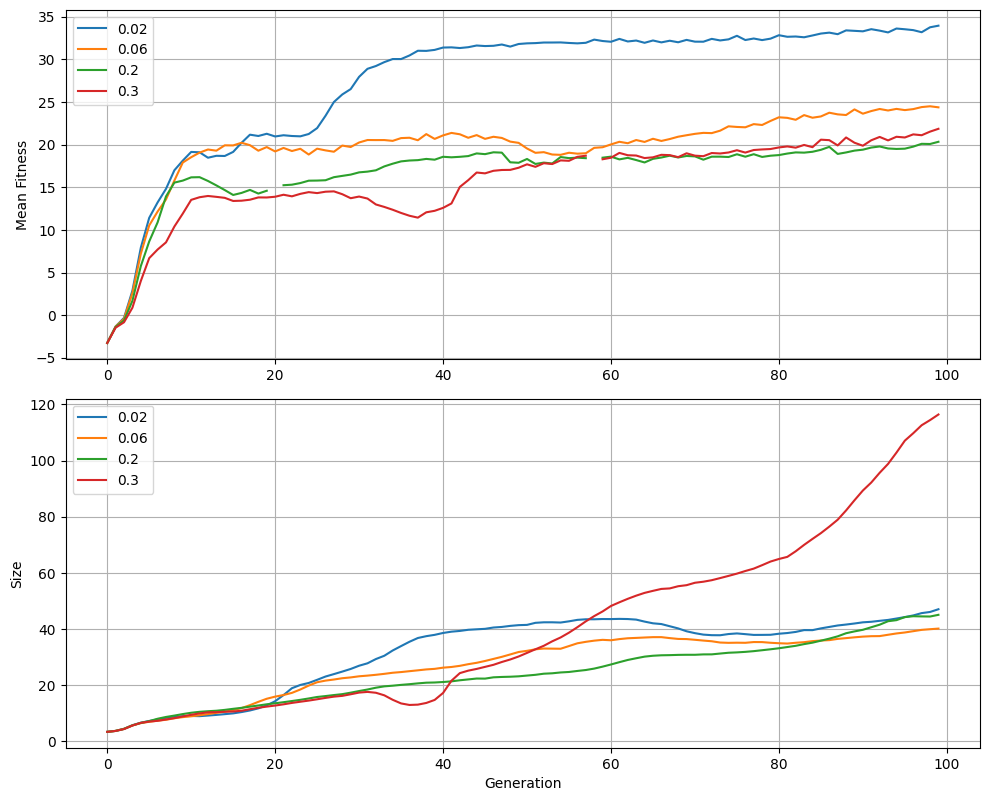

In [37]:
import matplotlib.pyplot as plt
import pandas as pd


def read_columns_with_pandas(file_name):
    df = pd.read_csv(file_name + ".csv")
    return {col: df[col].tolist() for col in df.columns}


data1 = read_columns_with_pandas("data/results/20250409_000201")
data2 = read_columns_with_pandas("data/results/20250409_000203")
data3 = read_columns_with_pandas("data/results/20250408_234103")
data4 = read_columns_with_pandas("data/results/20250408_234104")

plt.figure(figsize=(10, 12))

# plt.subplot(3, 1, 1)
# plt.plot(data1["generation"][:100], data1["best_fitness"][:100], label="0.02")
# plt.plot(data2["generation"][:100], data2["best_fitness"][:100], label="0.06")
# plt.plot(data3["generation"][:100], data3["best_fitness"][:100], label="0.2")
# plt.plot(data4["generation"][:100], data4["best_fitness"][:100], label="0.3")
# plt.ylabel("Max Fitness")
# plt.grid(True)
# plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data1["generation"][:100], data1["mean_fitness"][:100], label="0.02")
plt.plot(data2["generation"][:100], data2["mean_fitness"][:100], label="0.06")
plt.plot(data3["generation"][:100], data3["mean_fitness"][:100], label="0.2")
plt.plot(data4["generation"][:100], data4["mean_fitness"][:100], label="0.3")
plt.ylabel("Mean Fitness")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data1["generation"][:100], data1["mean_tree_size"][:100], label="0.02")
plt.plot(data2["generation"][:100], data2["mean_tree_size"][:100], label="0.06")
plt.plot(data3["generation"][:100], data3["mean_tree_size"][:100], label="0.2")
plt.plot(data4["generation"][:100], data4["mean_tree_size"][:100], label="0.3")
plt.xlabel("Generation")
plt.ylabel("Size")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()